In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [56]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

In [2]:
data = pd.read_csv("./data/08_wine.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
X = data[["alcohol", "sugar", "pH"]].to_numpy()
Y = data["class"].to_numpy()
X.shape, Y.shape

((6497, 3), (6497,))

In [4]:
X = data.iloc[:,:3].to_numpy()
Y = data["class"].to_numpy()
X.shape, Y.shape

((6497, 3), (6497,))

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       ...,
       [-0.91546416, -0.89191614, -1.42124765],
       [ 1.9354021 , -0.91293585,  0.75571005],
       [ 1.09691202, -0.97599501,  0.25811972]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [7]:
param_grid = {
    "n_init" : [10, 30, 50],          # 초기 군집의 중심점을 몇번에 걸쳐서 재계산하면서 이돌할지 횟수 지정
    "max_iter" : [10, 30, 50, 100],   # 최대 반복 횟수 설정
    "tol" : [0.0001, 0.001, 0.01, 1] # 훈련 종료를 위한 기준값 설정 -> 중심점의 이동이 기준값보다 작으면 훈련을 종료 시킴
}

n_clusters = 2  # 군집(범주)의 갯수 정의 -> 몇개의 클러스터(군집, 범주)로 나눌지 지정

# cv 모델 설정값 정의
cv = 5
scoring = "accuracy"

In [8]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


In [9]:
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=cv, scoring=scoring)
grid_search

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50, 100], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50, 100], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [11]:
best_model = grid_search.best_estimator_

In [12]:
test_pred = best_model.predict(X_test)
train_pred = best_model.predict(X_train)

In [13]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

train_acc, test_acc, train_acc - test_acc

(0.4593034442947855, 0.44769230769230767, 0.011611136602477812)

In [14]:
data_v = {
    "alcohol" : X_test[:, 0],
    "sugar" : X_test[:, 1],
    "pH" : X_test[:, 2],
    "class" : y_test[:],
    "cluster" : test_pred[:],
}

test_data = pd.DataFrame(data = data_v)

In [15]:
test_data

,alcohol,sugar,pH,class,cluster
0,-1.083162,-0.744778,0.258120,0.0,1
1,0.593818,-0.954975,1.564294,1.0,1
2,-0.915464,0.831701,-0.301669,1.0,0
3,0.761516,0.180090,-0.426067,1.0,1
4,-0.915464,-0.723758,0.817909,0.0,1
...,...,...,...,...,...
1295,1.348459,-0.849877,0.880108,1.0,1
1296,1.516157,-0.051127,0.817909,1.0,1
1297,-0.663917,-0.639680,1.750891,1.0,1
1298,0.803440,-0.912936,-1.110254,1.0,1


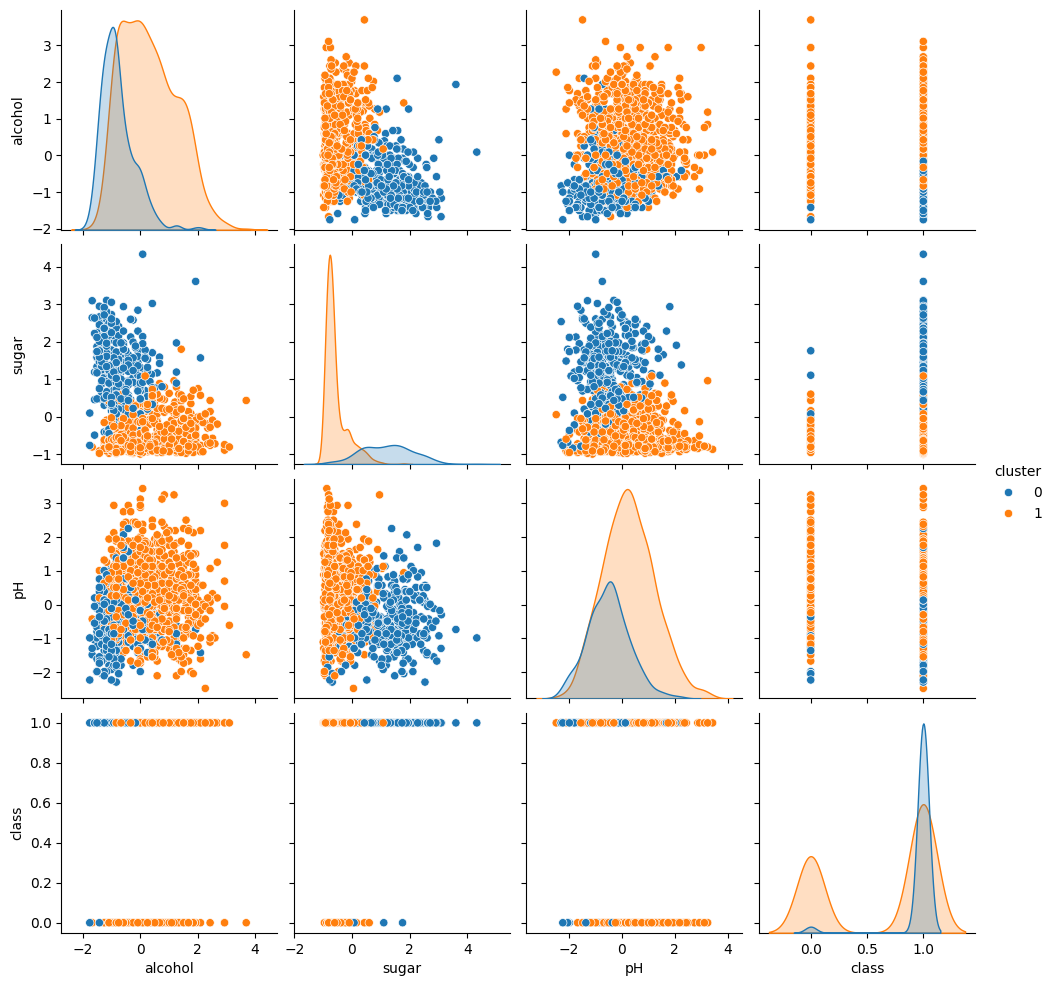

In [16]:
# 산점행렬도로 시각화하기
sns.pairplot(test_data, hue="cluster")
plt.show()

In [20]:
from sklearn.datasets import load_iris

#  silhouette_scor 정확도의 범위 : 1 ~ -1
# -> 1에 가까울 수록 군집이 잘된 경우
# -> 0에 가까울 수록 이도 저도 아닌 상태(군집데이터들이 섞여 있는 경우)
# -> -1에 가까울 수록 군집이 잘 안 된 경우
from sklearn.metrics import silhouette_score

# adjusted_rand_score 정확도의 범위 : 1 ~ 0
# -> 1에 가까울 수록 군집이 잘된 경우
# -> 0에 가까울 수록 군집이 잘 안 된 경우
from sklearn.metrics import adjusted_rand_score

In [32]:
iris = load_iris()

In [33]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [44]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42, )
kmeans_model

KMeans(n_clusters=3, n_init=10, random_state=42)

In [49]:
kmeans_labels = kmeans_model.fit_predict(X)  # fit_predict : 훈련과 도시에 예측까지 수행하는 함수
print(kmeans_labels)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 주성분 분석 (PCA)
- 훈련에 사용된 특성들의 각 데이터들 중에 특징을 가장 잘 나타낼 수 있는 데이터들을 추출하는 방법
- 추출한 가장 잘 나타낼 수 있는 데이터들을 추출하는 방법
- 주성분 분석 시 축소하고자 하는 차원을 지정하면 해당 차원으로 특징을 추출하여 지정된 차원으로 데이터를 구성해 줍니다
- 데이터양이 많은 경우 주성분분석을 주로 사용합니다 --> 처리 시간을 빠르게 할 수 있습니다.
    --> 이미지 처리, 군집 분석 시에 주로 사용되며, 이외 회귀, 분류분석에서도 사용됩니다.



In [51]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)

In [54]:
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

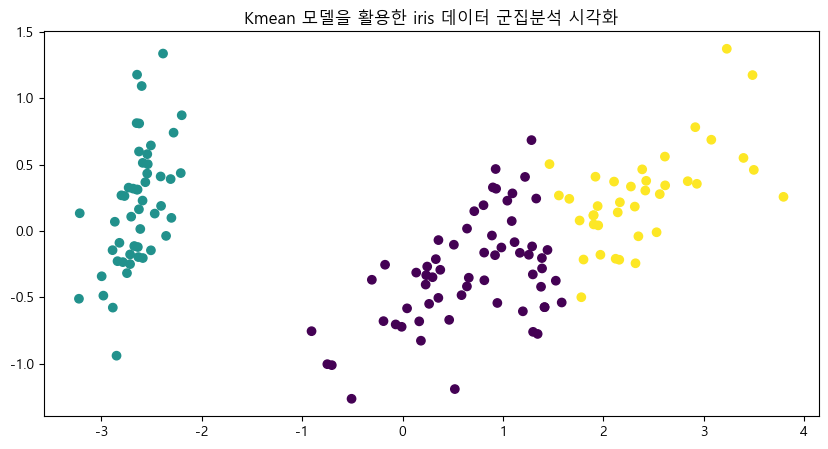

In [58]:
plt.figure(figsize=(10,5))
plt.title("노이즈가 포함된 원본(")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)

In [59]:
### silhouette_score
# - 다른 클러스터(군집)들과 잘 분리가 되어있는지의 정도를 평가하는 지표
# - 사용 데이터 : 독립변수, 예측한 종속변수 사용

silhouette_score(X, kmeans_labels)

np.float64(0.5528190123564095)

In [ ]:
### 
# - 클러스터링 결과 실제 정답이 얼마나평가하는 지표
# - 사용 데이터 : 실제정답, 예측한 종속변수 사용

adjusted_rand_score(y, kmeans_labels)